<a href="https://colab.research.google.com/github/gokul-gk17/cse326/blob/main/Results_Aggregation_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install matplotlib seaborn pandas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

<ipython-input-7-1f67f7f17970>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_f1, x='OCR', y='F1', palette='viridis')


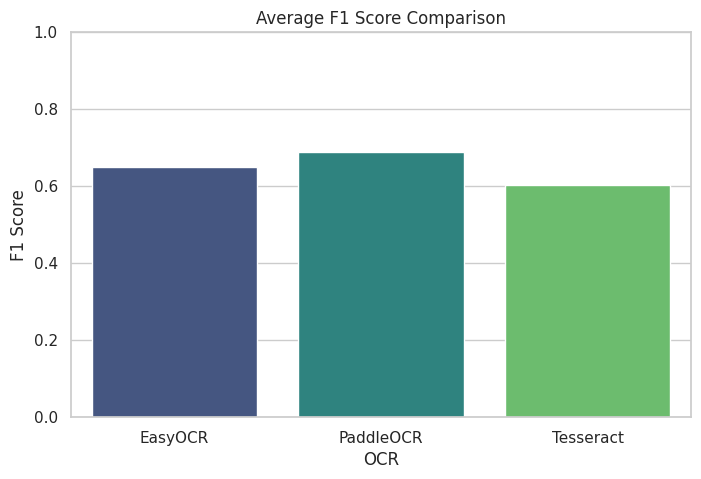

In [7]:
base_path = "/content/drive/MyDrive/OCR_Project"
ocr_engines = ["EasyOCR", "PaddleOCR", "Tesseract"]
dfs = {}

for ocr in ocr_engines:
    path = os.path.join(base_path, f"{ocr}_Results/results.csv")
    df = pd.read_csv(path)
    df['OCR'] = ocr
    dfs[ocr] = df


all_data = pd.concat(dfs.values(), ignore_index=True)


sns.set(style="whitegrid")

avg_f1 = all_data.groupby('OCR')['F1'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_f1, x='OCR', y='F1', palette='viridis')
plt.title("Average F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

<ipython-input-8-3059cb25ba00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='OCR', y='CER', palette='pastel')


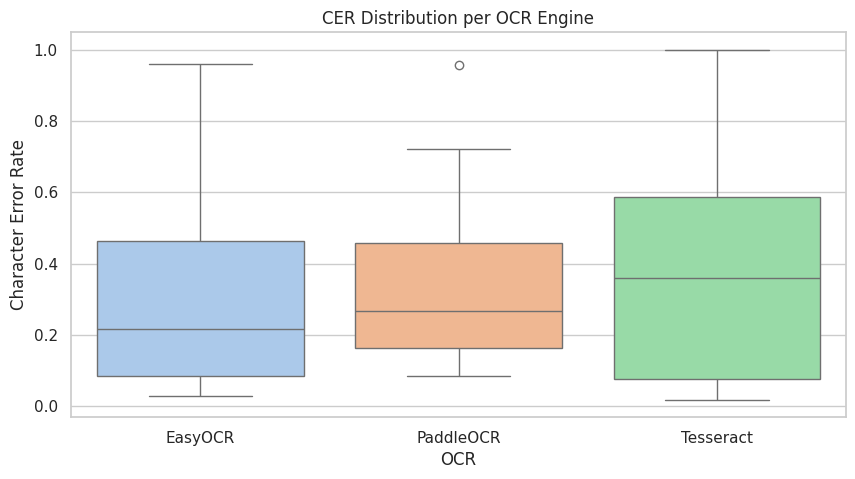

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=all_data, x='OCR', y='CER', palette='pastel')
plt.title("CER Distribution per OCR Engine")
plt.ylabel("Character Error Rate")
plt.show()

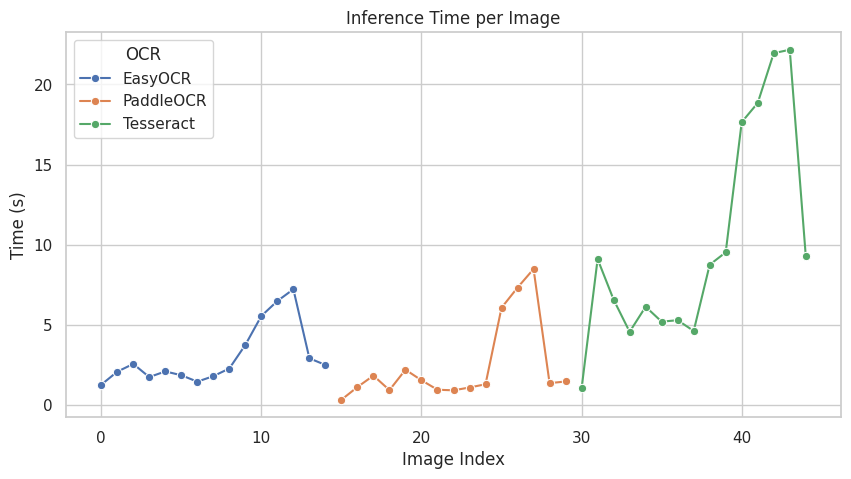

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=all_data, x=range(len(all_data)), y='Time', hue='OCR', marker='o')
plt.title("Inference Time per Image")
plt.ylabel("Time (s)")
plt.xlabel("Image Index")
plt.show()

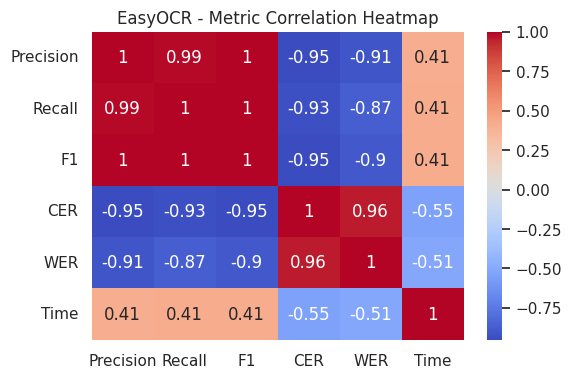

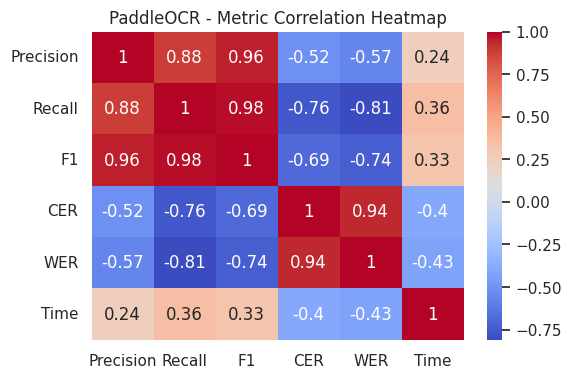

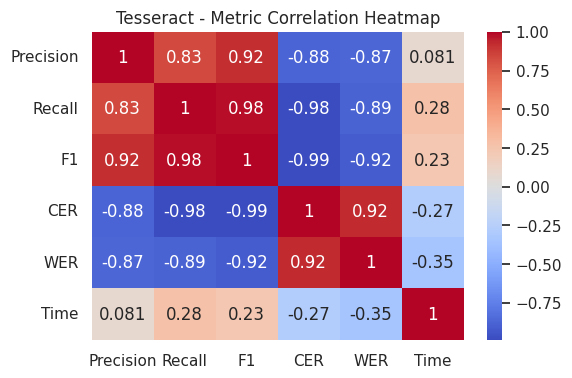

In [21]:
for ocr in ocr_engines:
    plt.figure(figsize=(6,4))
    sns.heatmap(dfs[ocr][['Precision','Recall','F1','CER','WER','Time']].corr(), annot=True, cmap='coolwarm')
    plt.title(f"{ocr} - Metric Correlation Heatmap")
    plt.show()

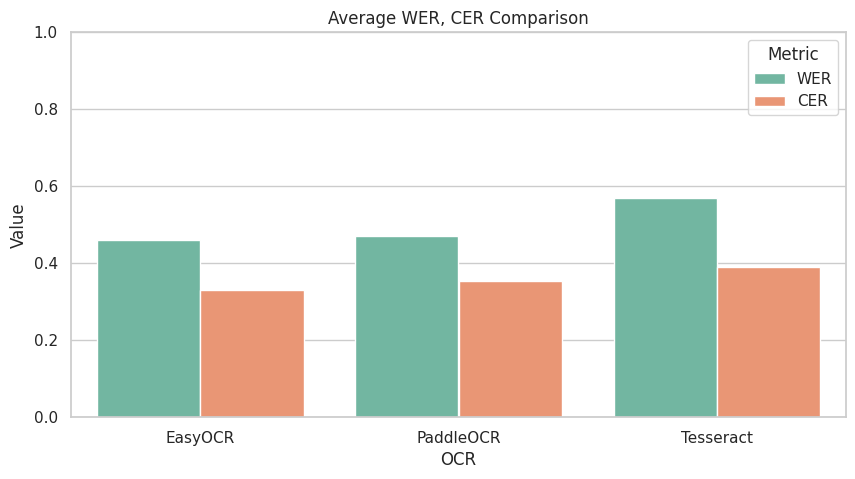

In [14]:
metrics_avg = all_data.groupby('OCR')[['WER', 'CER']].mean().reset_index()
metrics_avg_melted = metrics_avg.melt(id_vars='OCR', var_name='Metric', value_name='Value')
plt.figure(figsize=(10,5))
sns.barplot(data=metrics_avg_melted, x='OCR', y='Value', hue='Metric', palette='Set2')
plt.title("Average WER, CER Comparison")
plt.ylim(0, 1)
plt.show()

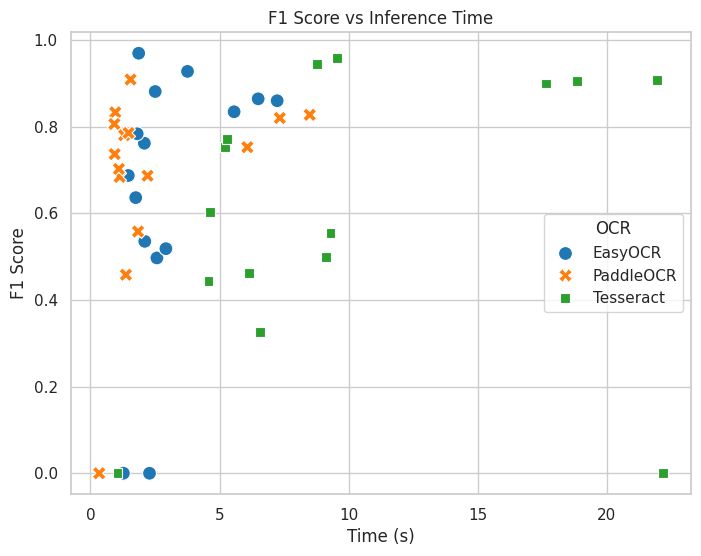

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_data, x='Time', y='F1', hue='OCR', style='OCR', palette='tab10', s=100)
plt.title("F1 Score vs Inference Time")
plt.xlabel("Time (s)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

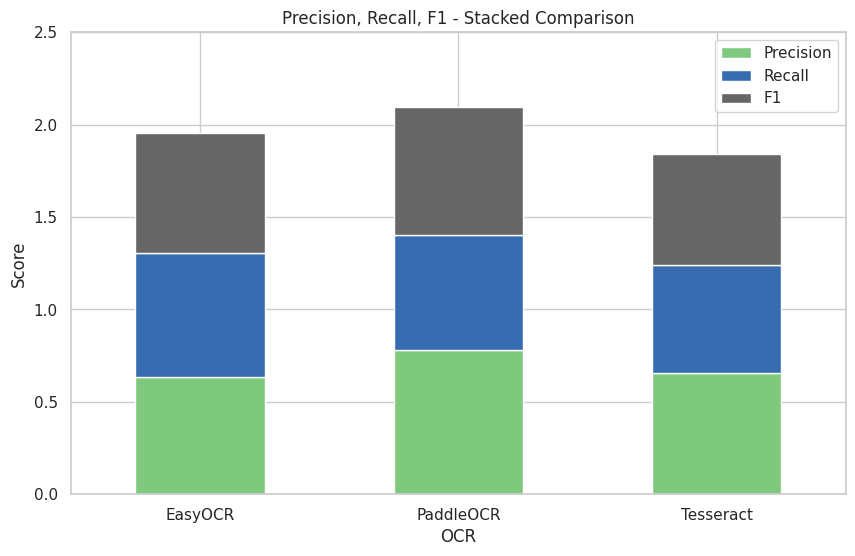

In [13]:
prf_avg = all_data.groupby('OCR')[['Precision','Recall','F1']].mean()
prf_avg.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title("Precision, Recall, F1 - Stacked Comparison")
plt.ylabel("Score")
plt.ylim(0, 2.5)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import os
import cv2

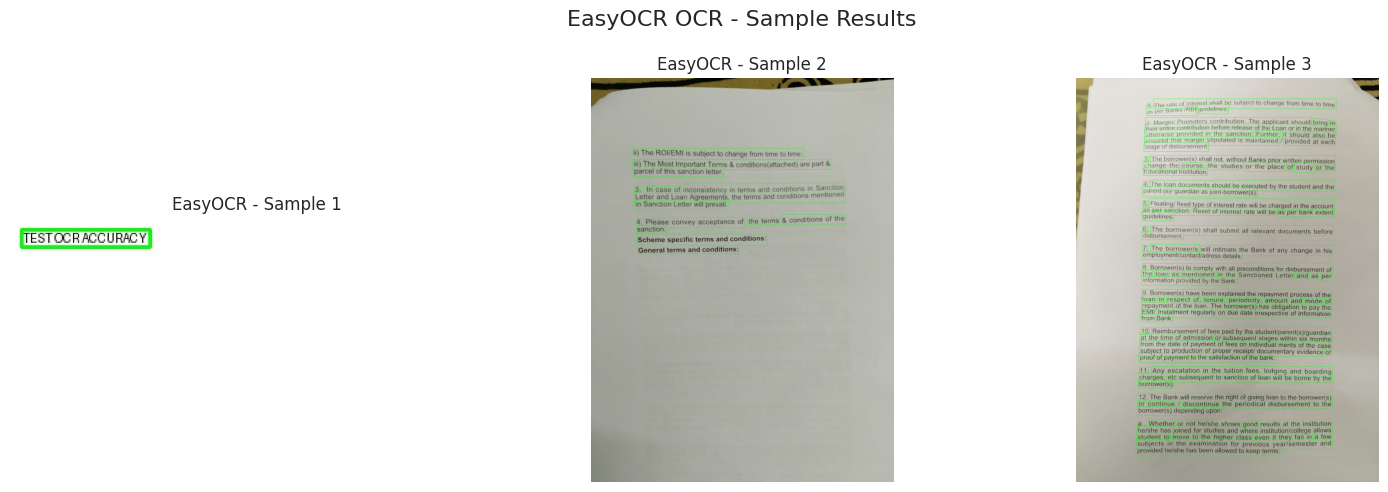

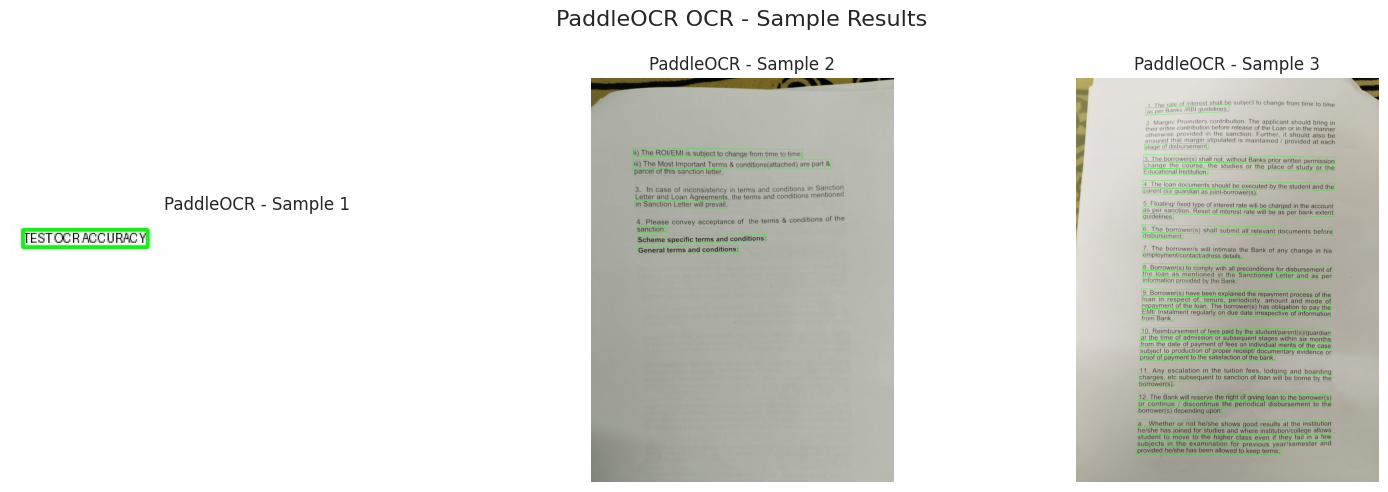

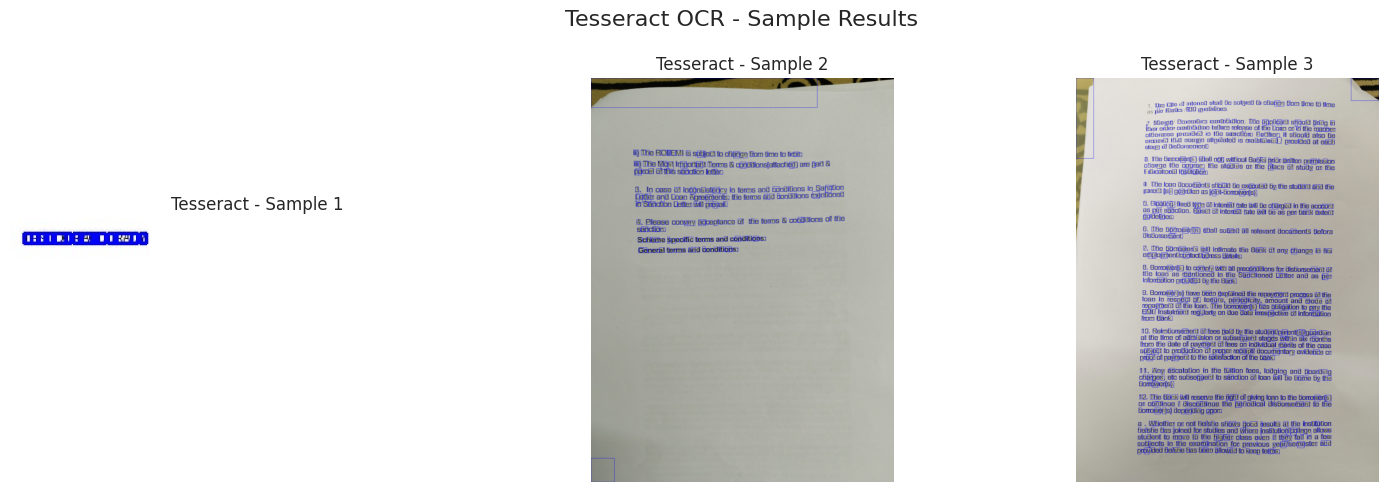

In [18]:
def show_sample_images(ocr_engine, vis_path, n=3):
    files = sorted([f for f in os.listdir(vis_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))])
    sample_files = files[:n]

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(vis_path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"{ocr_engine} - Sample {i+1}")
        plt.axis('off')
    plt.suptitle(f"{ocr_engine} OCR - Sample Results", fontsize=16)
    plt.tight_layout()
    plt.show()


easy_vis = "/content/drive/MyDrive/OCR_Project/EasyOCR_Results/vis"
paddle_vis = "/content/drive/MyDrive/OCR_Project/PaddleOCR_Results/vis"
tesseract_vis = "/content/drive/MyDrive/OCR_Project/Tesseract_Results/vis"


show_sample_images("EasyOCR", easy_vis)
show_sample_images("PaddleOCR", paddle_vis)
show_sample_images("Tesseract", tesseract_vis)